# IMPORT LIBRARY YANG DIGUNAKAN

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATASET

In [2]:
data = pd.read_csv('data-awal.csv')
data

,no_pendaftaran,first_name,last_name,email,gender,asal_sekolah,nilai_mtk,nilai_b_indo,nilai_b_ing,nilai_agama,nilai_penjas,nilai_kimia,nilai_biologi,nilai_fisika,nilai_ppkn,nilai_kesenian,nilai_rata_spmb,keterangan
0,1,Sanderson,Codrington,scodrington0@tuttocitta.it,Perempuan,SMA 10,8.0,6.5,9.0,8.0,8.0,6.5,6.5,7.5,9.0,8.0,6.5,pertimbangan
1,2,Carlos,Naish,cnaish1@adobe.com,Laki-laki,SMA 2,7.0,8.5,8.0,6.5,7.5,8.0,8.0,7.5,7.0,7.5,6.5,lulus
2,3,Essie,Kerner,ekerner2@123-reg.co.uk,Perempuan,SMA 3,7.5,6.5,8.5,6.5,7.5,9.0,7.5,8.0,8.5,9.0,9.0,tidak lulus
3,4,Mikol,Sinclaire,msinclaire3@samsung.com,Perempuan,SMA 3,9.0,6.5,9.0,9.0,8.0,9.0,9.0,8.5,7.0,7.5,6.5,tidak lulus
4,5,Dyanna,Schimaschke,dschimaschke4@comsenz.com,Laki-laki,SMA 9,8.5,9.0,6.5,7.0,6.5,6.5,6.5,7.5,8.5,6.5,8.5,tidak lulus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sid,Scafe,sscafern@over-blog.com,Laki-laki,SMA 2,7.0,7.5,7.5,8.5,8.5,7.5,8.0,9.0,9.0,8.0,7.5,tidak lulus
996,997,William,Spykings,wspykingsro@cnbc.com,Laki-laki,SMA 1,8.5,7.5,8.0,9.0,7.5,6.5,8.0,7.0,8.0,8.5,6.5,lulus
997,998,Sayres,Aitkin,saitkinrp@apache.org,Perempuan,SMA 6,7.0,7.0,6.5,7.0,7.5,8.0,8.5,9.0,7.5,6.5,8.0,lulus
998,999,Rich,Langrick,rlangrickrq@ed.gov,Perempuan,SMA 4,8.0,7.0,6.5,9.0,6.5,9.0,7.5,7.5,7.5,7.5,7.5,pertimbangan


# MERUBAH DATASET AWAL DENGAN MENJUMLAH SELURUH NILAI MATA PELAJARAN JADIKAN RATA-RATA DAN BUAT KOLOM BARU RATA_RATA_RAPOR

In [3]:
df = pd.DataFrame(data)
df['rata_rata_rapor'] = df['nilai_mtk'] + df['nilai_b_indo'] + df['nilai_b_ing'] + df['nilai_agama'] + df['nilai_penjas'] + df['nilai_kimia'] + df['nilai_biologi'] + df['nilai_fisika'] + df['nilai_ppkn'] + df['nilai_kesenian'] / 10
df

,no_pendaftaran,first_name,last_name,email,gender,asal_sekolah,nilai_mtk,nilai_b_indo,nilai_b_ing,nilai_agama,nilai_penjas,nilai_kimia,nilai_biologi,nilai_fisika,nilai_ppkn,nilai_kesenian,nilai_rata_spmb,keterangan,rata_rata_rapor
0,1,Sanderson,Codrington,scodrington0@tuttocitta.it,Perempuan,SMA 10,8.0,6.5,9.0,8.0,8.0,6.5,6.5,7.5,9.0,8.0,6.5,pertimbangan,69.80
1,2,Carlos,Naish,cnaish1@adobe.com,Laki-laki,SMA 2,7.0,8.5,8.0,6.5,7.5,8.0,8.0,7.5,7.0,7.5,6.5,lulus,68.75
2,3,Essie,Kerner,ekerner2@123-reg.co.uk,Perempuan,SMA 3,7.5,6.5,8.5,6.5,7.5,9.0,7.5,8.0,8.5,9.0,9.0,tidak lulus,70.40
3,4,Mikol,Sinclaire,msinclaire3@samsung.com,Perempuan,SMA 3,9.0,6.5,9.0,9.0,8.0,9.0,9.0,8.5,7.0,7.5,6.5,tidak lulus,75.75
4,5,Dyanna,Schimaschke,dschimaschke4@comsenz.com,Laki-laki,SMA 9,8.5,9.0,6.5,7.0,6.5,6.5,6.5,7.5,8.5,6.5,8.5,tidak lulus,67.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sid,Scafe,sscafern@over-blog.com,Laki-laki,SMA 2,7.0,7.5,7.5,8.5,8.5,7.5,8.0,9.0,9.0,8.0,7.5,tidak lulus,73.30
996,997,William,Spykings,wspykingsro@cnbc.com,Laki-laki,SMA 1,8.5,7.5,8.0,9.0,7.5,6.5,8.0,7.0,8.0,8.5,6.5,lulus,70.85
997,998,Sayres,Aitkin,saitkinrp@apache.org,Perempuan,SMA 6,7.0,7.0,6.5,7.0,7.5,8.0,8.5,9.0,7.5,6.5,8.0,lulus,68.65
998,999,Rich,Langrick,rlangrickrq@ed.gov,Perempuan,SMA 4,8.0,7.0,6.5,9.0,6.5,9.0,7.5,7.5,7.5,7.5,7.5,pertimbangan,69.25


# MERUBAH VARIABEL STRING TO INT DARI DATASET

In [4]:
df["keterangan"].replace({'tidak lulus':-1, 'lulus':1, 'pertimbangan':0}, inplace=True)
df["keterangan"]

0      0
1      1
2     -1
3     -1
4     -1
      ..
995   -1
996    1
997    1
998    0
999   -1
Name: keterangan, Length: 1000, dtype: int64

# CROSCHECK KOLOM DATASET YANG TIDAK NUMERIK

In [5]:
nonnumeric_columns = [df.columns[index] for index, dtype in enumerate(df.dtypes) if dtype == 'object']
nonnumeric_columns

['first_name', 'last_name', 'email', 'gender', 'asal_sekolah']

# MERUBAH DATASET AWAL MENJADI DUMMIES

In [6]:
dummies = pd.concat([pd.get_dummies(df['no_pendaftaran']),
                     pd.get_dummies(df['first_name']),
                     pd.get_dummies(df['last_name']),
                     pd.get_dummies(df['email']),
                     pd.get_dummies(df['gender']),
                     pd.get_dummies(df['asal_sekolah']),
                     pd.get_dummies(df['nilai_mtk']),
                     pd.get_dummies(df['nilai_b_indo']),
                     pd.get_dummies(df['nilai_b_ing']),
                     pd.get_dummies(df['nilai_agama']),
                     pd.get_dummies(df['nilai_penjas']),
                     pd.get_dummies(df['nilai_kimia']),
                     pd.get_dummies(df['nilai_biologi']),
                     pd.get_dummies(df['nilai_fisika']),
                     pd.get_dummies(df['nilai_ppkn']),
                     pd.get_dummies(df['nilai_kesenian'])],
                     axis=1)

# MENYISIHKAN DATA YANG TIDAK DIPERLUKAN

In [7]:
df = pd.concat([df, dummies], axis=1)
df.drop(['no_pendaftaran' , 'first_name', 'last_name', 'email', 'gender', 'asal_sekolah', 'nilai_mtk', 'nilai_b_indo', 'nilai_b_ing', 'nilai_agama', 'nilai_penjas', 'nilai_kimia', 'nilai_biologi', 'nilai_fisika', 'nilai_ppkn', 'nilai_kesenian'], axis =1, inplace= False)

,nilai_rata_spmb,keterangan,rata_rata_rapor,1,2,3,4,5,6,7,...,7.5,8.0,8.5,9.0,6.5,7.0,7.5,8.0,8.5,9.0
0,6.5,0,69.80,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,6.5,1,68.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,9.0,-1,70.40,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,6.5,-1,75.75,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.5,-1,67.15,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.5,-1,73.30,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
996,6.5,1,70.85,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
997,8.0,1,68.65,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
998,7.5,0,69.25,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# MENYIMPAN DATA YANG TELAH DISISIHKAN JADI MENJADI DATASET BARU

In [9]:
cleardata = df.loc[:, ['rata_rata_rapor','nilai_rata_spmb', 'keterangan']]
cleardata.to_csv('data-jadi.csv', index=False)

In [10]:
ta = pd.read_csv("data-jadi.csv")
ta

,rata_rata_rapor,nilai_rata_spmb,keterangan
0,69.80,6.5,0
1,68.75,6.5,1
2,70.40,9.0,-1
3,75.75,6.5,-1
4,67.15,8.5,-1
...,...,...,...
995,73.30,7.5,-1
996,70.85,6.5,1
997,68.65,8.0,1
998,69.25,7.5,0


# MEMBUAT VISUALISASI

<AxesSubplot:>

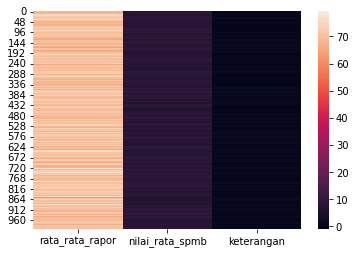

In [11]:
sns.heatmap(ta[['rata_rata_rapor','nilai_rata_spmb', 'keterangan']])

<AxesSubplot:xlabel='keterangan', ylabel='count'>

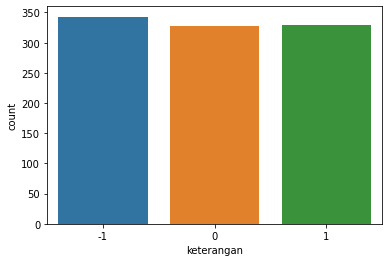

In [12]:
sns.countplot(ta["keterangan"])

# CROSCHECK JIKA MASIH ADA DATA YANG KOSONG(BELUM TERISI)

In [13]:
ta.isnull().sum()

rata_rata_rapor    0
nilai_rata_spmb    0
keterangan         0
dtype: int64

# MENAMPILKAN DATASET OLAHAN YANG BARU

In [14]:
olahan = df.loc[:, ['rata_rata_rapor','nilai_rata_spmb']]
olahan

,rata_rata_rapor,nilai_rata_spmb
0,69.80,6.5
1,68.75,6.5
2,70.40,9.0
3,75.75,6.5
4,67.15,8.5
...,...,...
995,73.30,7.5
996,70.85,6.5
997,68.65,8.0
998,69.25,7.5


# MELIHAT NILAI TENGAH DARI DATASET OLAHAN

In [15]:
sort = olahan.sort_values(by=["nilai_rata_spmb"])
sort.median()

rata_rata_rapor    70.4
nilai_rata_spmb     8.0
dtype: float64

# MEMBUAT STANDARISASI KETERANGAN BARU TERKAIT LULUS ATAU TIDAK

In [16]:
def f(olahan):
    if olahan['nilai_rata_spmb']>=8:
        val = 1
    elif olahan['nilai_rata_spmb']<=7:
        val = -1
    else:
        val = 0
    return val

olahan['keterangan'] = olahan.apply(f, axis=1)
olahan

,rata_rata_rapor,nilai_rata_spmb,keterangan
0,69.80,6.5,-1
1,68.75,6.5,-1
2,70.40,9.0,1
3,75.75,6.5,-1
4,67.15,8.5,1
...,...,...,...
995,73.30,7.5,0
996,70.85,6.5,-1
997,68.65,8.0,1
998,69.25,7.5,0


<AxesSubplot:xlabel='keterangan', ylabel='count'>

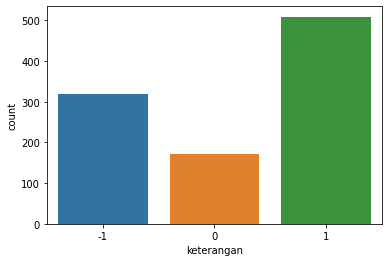

In [17]:
#olahan["keterangan"].replace({'Tidak Lulus':-1, 'Lulus':1, 'Pertimbangan':0}, inplace=True)
sns.countplot(olahan["keterangan"])

In [18]:
olahan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rata_rata_rapor  1000 non-null   float64
 1   nilai_rata_spmb  1000 non-null   float64
 2   keterangan       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


# MEMBUAT DATA TRAINING DAN TEST

In [19]:
olahan_train, olahan_test = train_test_split(olahan, train_size=0.7, random_state=42)

In [20]:
y_train = olahan_train.pop('keterangan')
x_train = olahan_train

y_test = olahan_test.pop('keterangan')
x_test = olahan_test

In [21]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_train.describe()

,rata_rata_rapor,nilai_rata_spmb
count,7.000000e+02,7.000000e+02
mean,-3.540025e-15,-2.055499e-16
std,1.000715e+00,1.000715e+00
min,-3.622415e+00,-1.421192e+00
25%,-6.712510e-01,-8.546577e-01
50%,-6.936899e-02,2.784112e-01
75%,6.878375e-01,8.449456e-01
max,3.347768e+00,1.411480e+00


In [22]:
print(olahan_train.shape)
print(olahan_test.shape)

(700, 2)
(300, 2)


# MENYIMPAN MODEL YANG TELAH DIBUAT

In [25]:
model = LinearRegression()

mlr = model.fit(x_train,y_train)

filename = 'mlr.sav'
joblib.dump(mlr, filename)

['mlr.sav']

# SCORE TRAINING

In [26]:
mlr.score(x_train,y_train)

0.8641501119491484

In [80]:
#x=olahan.drop('keterangan',axis=1)
#y=olahan['keterangan']

In [81]:
#scale=StandardScaler()
#x=scale.fit_transform(x)

In [87]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.9)
#x_train.shape

(100, 2)

In [24]:
rfr = RandomForestClassifier().fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_train, y_train)
logmod = LogisticRegression().fit(x_train, y_train)
mlr = LinearRegression().fit(x_train,y_train)

#filename = 'logmod.sav'
#joblib.dump(logmod, filename)

#filename = 'knn.sav'
#joblib.dump(knn, filename)

#filename = 'rfr.sav'
#joblib.dump(rfr, filename)

#filename = 'mlr.sav'
#joblib.dump(mlr, filename)

print("Random Forest Regressor Score: {:.2f}".format(rfr.score(x_train, y_train)))
print("K Nearest Neighbors Score: {:.2f}".format(knn.score(x_train, y_train)))
print("Logistic Regression Score: {:.2f}".format(logmod.score(x_train, y_train)))
print("Linear Regression Score: {:.2f}".format(mlr.score(x_train, y_train)))

Random Forest Regressor Score: 1.00
K Nearest Neighbors Score: 1.00
Logistic Regression Score: 1.00
Linear Regression Score: 0.86
